In [260]:
#question 1 who is the TOC?
# xls with stannox codes
#looked at 3 random Stannox codes from data set and cross referenced with the link below. They all coincided with the same route exclusively
# https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjGjaLroKb6AhXUglwKHWdoD0UQFnoECAsQAQ&url=https%3A%2F%2Fwww.whatdotheyknow.com%2Frequest%2F256648%2Fresponse%2F626117%2Fattach%2F2%2FSTANME%2520codes.xls%3Fcookie_passthrough%3D1&usg=AOvVaw3JNrSQg5E-AZztCZdDp6Dc
# Answer: C2C, Trenitalia c2c Limited

#question 2
# a)

import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display

path = r'C:\Users\Melch\Downloads\train_timings_data\train_timings_data.csv'

#set a datetimeindex and  csv --> dataframe
df_train_time_data = pd.read_csv(path, parse_dates=['signal_passing_time'], index_col='signal_passing_time')
#convert all time coloumns to datetime
#df_train_time_data[['actual_event_time','planned_event_time']] = df_train_time_data[['actual_event_time','planned_event_time']].apply(pd.to_datetime)
df = df_train_time_data.groupby([pd.Grouper(freq='D'), 'planned_event_type']).count().unstack()
df['planned_event_time']
#df = df_train_time_data.groupby('signal_passing_time').resample('H').count()

planned_event_type,ARRIVAL,DEPARTURE,DESTINATION
signal_passing_time,,,
2022-04-01 00:00:00+00:00,3232,4714,453
2022-04-02 00:00:00+00:00,3083,4142,305
2022-04-03 00:00:00+00:00,1339,1889,145
2022-04-04 00:00:00+00:00,3141,4593,442
2022-04-05 00:00:00+00:00,3177,4661,450
...,...,...,...
2022-07-27 00:00:00+00:00,838,1269,146
2022-07-28 00:00:00+00:00,3130,4308,326
2022-07-29 00:00:00+00:00,3670,5126,396


<AxesSubplot:title={'center':'Mean train distribution through the week'}, ylabel='day of the week'>

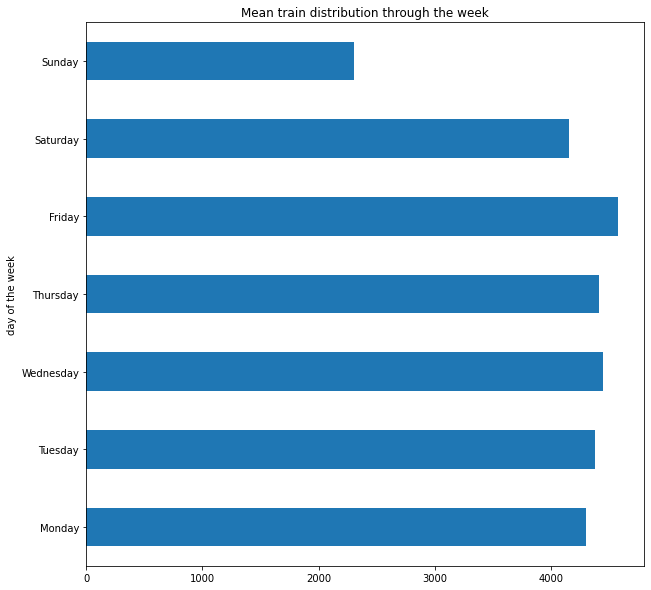

In [261]:

#q2 a) continued
#average number of trains per week day bar chart plot
df_weekly_average = df['planned_event_time','DEPARTURE'].groupby(df.index.day_of_week).mean()

df_weekly_average.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#print(df_weekly_average.columns)
df_weekly_average.plot(kind= 'barh', xlabel='day of the week', ylabel= 'number of trains', figsize=(10, 10), title='Mean train distribution through the week')


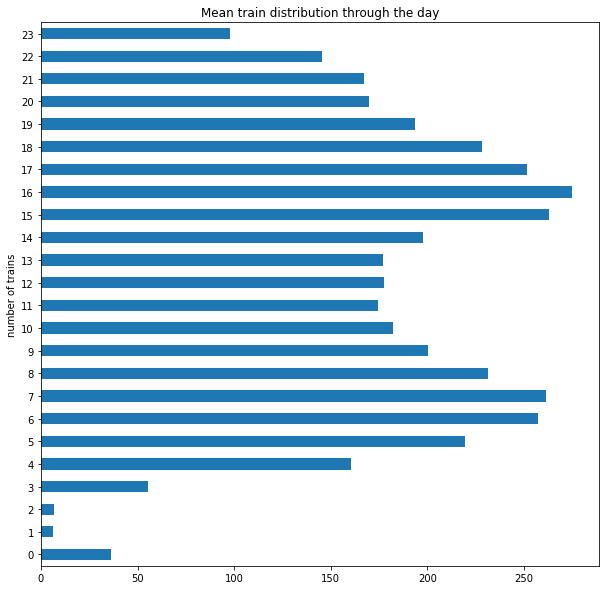

<AxesSubplot:>

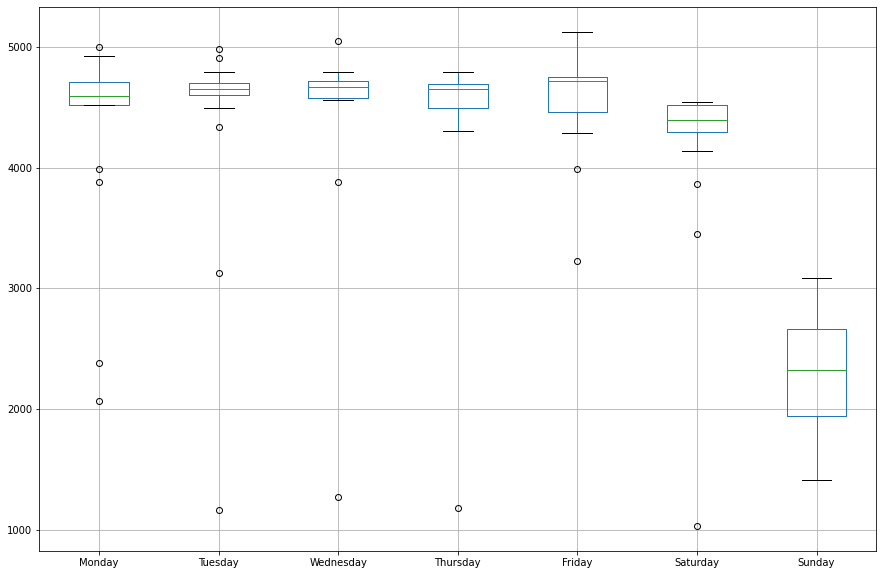

In [323]:
#q2 b)
#average number of trains per hour bar chart plot
df_hourlyAverage = df_train_time_data.groupby([pd.Grouper(freq='1H'), 'planned_event_type']).count().unstack()

df_hourlyAverage['planned_event_time','DEPARTURE'].groupby(df_hourlyAverage.index.hour).mean().plot( kind='barh', xlabel='number of trains', ylabel= 'hour of the day', figsize=(10, 10), title='Mean train distribution through the day')
#df['planned_event_time','DEPARTURE'].resample('H').groupby([df.index.hour])
#df_hourlyAverage['planned_event_time','DEPARTURE'].groupby(df_hourlyAverage.index.hour).boxplot
# .count().plot()

plt.show()




#boxplot of weekly train numbers

df_21 = df_train_time_data.groupby([pd.Grouper(freq='D'), 'planned_event_type']).count().unstack()


df_h=df_21['actual_event_time','DEPARTURE'].to_frame()

df_h['dates'] = df_h.index.date
df_h['week_day'] =df_h.index.day_of_week

x =df_h.pivot(index='dates', columns='week_day')
x.columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



x.boxplot(figsize=(15,10))




In [324]:
#q3
#where is difference between signal_passing_time(s) greater than 1 second?

missing_data = df_train_time_data.index.to_series().diff().dt.days > 1

missing_data.value_counts()
missing_data.map({'True': True , 'False': False})
missing_data.columns=['TorF']

outageDates = missing_data.index[missing_data]
outageDates
#2022-07-31

DatetimeIndex(['2022-05-10 00:16:22+00:00', '2022-05-23 04:40:01+00:00',
               '2022-06-13 12:05:46+00:00', '2022-06-13 12:05:22+00:00',
               '2022-07-25 04:18:56+00:00'],
              dtype='datetime64[ns, UTC]', name='signal_passing_time', freq=None)

In [325]:
df_strike_time = df_train_time_data.groupby([pd.Grouper(freq='1D'), 'planned_event_type']).count().unstack()
df_strike_time['planned_event_time']

planned_event_type,ARRIVAL,DEPARTURE,DESTINATION
signal_passing_time,,,
2022-04-01 00:00:00+00:00,3232,4714,453
2022-04-02 00:00:00+00:00,3083,4142,305
2022-04-03 00:00:00+00:00,1339,1889,145
2022-04-04 00:00:00+00:00,3141,4593,442
2022-04-05 00:00:00+00:00,3177,4661,450
...,...,...,...
2022-07-27 00:00:00+00:00,838,1269,146
2022-07-28 00:00:00+00:00,3130,4308,326
2022-07-29 00:00:00+00:00,3670,5126,396


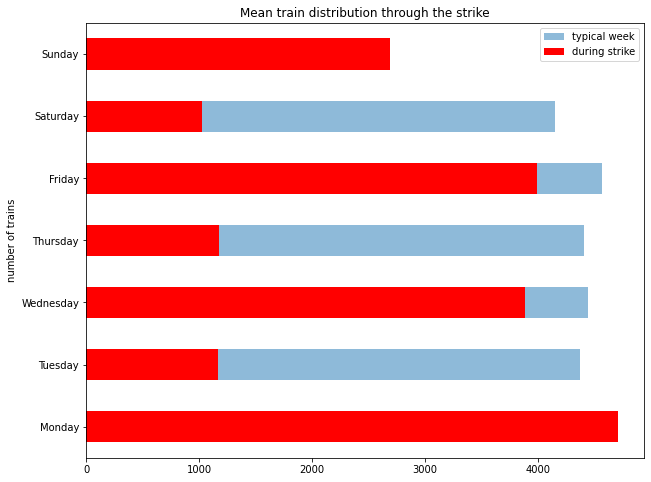

In [326]:
#q4
from calendar import day_name


df2 = df_train_time_data.groupby([pd.Grouper(freq='1D'), 'planned_event_type']).count().unstack()
df_strike_time = df2['2022-06-20':'2022-06-26']
#df_week_before_strike = df2['2022-05-20':'2022-07-26']

#group into each day
#df_strike_time = df_strike_time.groupby([pd.Grouper(freq='1D'), 'planned_event_type']).sum().unstack()



#plt.plot(df_strike_time['actual_event_time','DEPARTURE'], df_week_before_strike['actual_event_time','DEPARTURE'])
df_weekly_average.plot(kind= 'barh', xlabel='day of the week', ylabel= 'number of trains', figsize=(10, 8), title='Mean train distribution through the week', alpha=0.5, label = 'typical week')

#plt.show()
df_strike_time = df_strike_time['actual_event_time','DEPARTURE'].groupby([df_strike_time.index.day_of_week]).sum()
df_strike_time.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_strike_time.plot(kind='barh', x='', ylabel= 'number of trains', figsize=(10, 8), title='Mean train distribution through the strike', color= 'red', label='during strike')
plt.legend()
plt.show()
#df_week_before_strike['actual_event_time','DEPARTURE'].plot()
#Industrial action. On 7 June, initial strike dates were announced for 21, 23 and 25 June, 
# with rail employees at Network Rail and 13 train operators joining the action. 
# It was also announced that the 21 June strike would coincide with a planned 24-hour strike 
# to be held by workers on the London Underground.

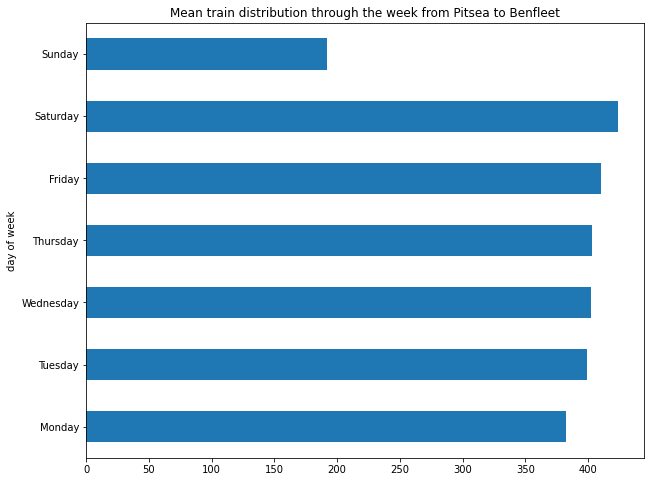

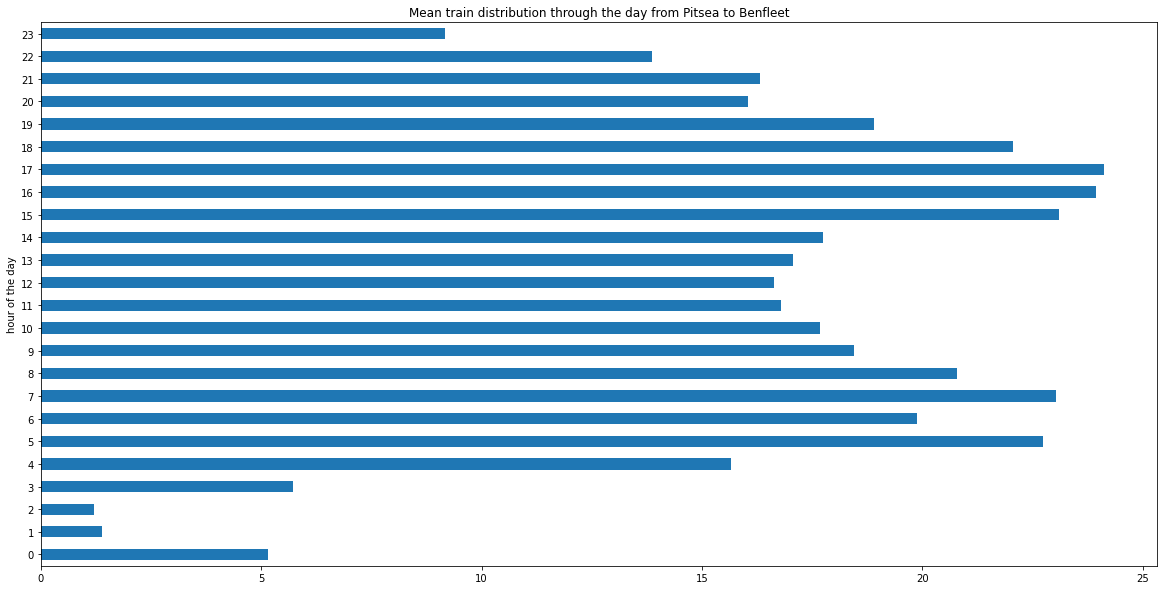

<AxesSubplot:>

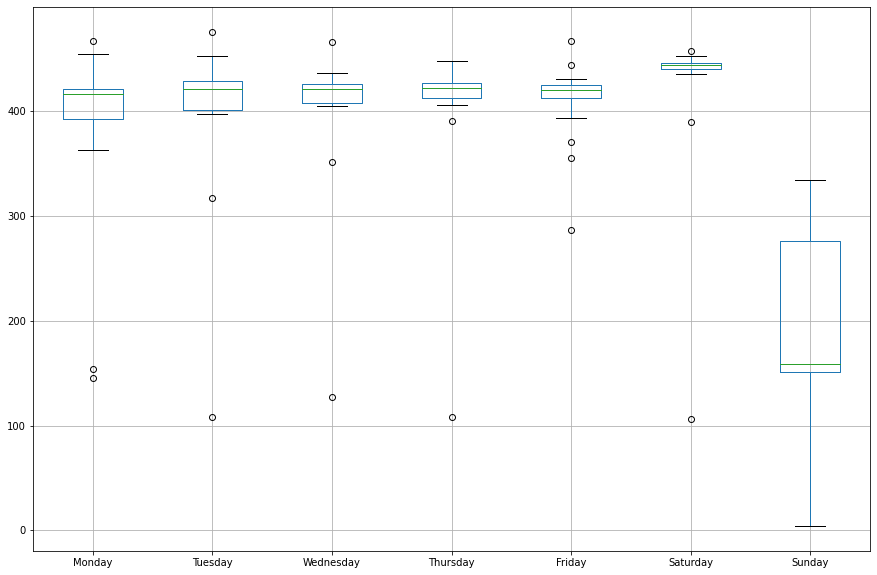

In [329]:
#q5 a) *was not able to complete fully due to isolating individual Pitsea to Benfleet train journeys
#Train running times as opposed to number of trains, journey lengths
#51016	PITSEA	PITSEA
#51014	BENFLEET	BENFLEET

#DEPARTURE Pitsea --> ARRIVAL Benfleet
#DEPARTURE Benfleet --> ARRIVAL Pitsea

#How frequent are these journeys?
df_Pitsea_Benfleet_Journey = df_train_time_data.loc[(df_train_time_data.planned_event_location == 51016) | (df_train_time_data.planned_event_location == 51014), :]
df_2 = df_Pitsea_Benfleet_Journey.groupby([pd.Grouper(freq='D'), 'planned_event_type']).count().unstack()



df_22 = df_2['actual_event_time','DEPARTURE'].groupby([df_2.index.day_of_week]).mean()
df_22.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#plot of mean actual event time weekly
df_22.plot(kind='barh', xlabel='day of week',  figsize=(10, 8), title='Mean train distribution through the week from Pitsea to Benfleet')

plt.show()
df_3 = df_Pitsea_Benfleet_Journey.groupby([pd.Grouper(freq='H'), 'planned_event_type']).count().unstack()

#plot of mean actual event time daily
df_3['actual_event_time','DEPARTURE'].groupby([df_3.index.hour]).mean().plot(kind='barh', xlabel='hour of the day', ylabel= 'hour of the day', figsize=(20, 10), title='Mean train distribution through the day from Pitsea to Benfleet')


plt.show()
df_i=df_2['actual_event_time','DEPARTURE'].to_frame()

df_i['dates'] = df_i.index.date
df_i['week_day'] =df_i.index.day_of_week

df_i
x =df_i.pivot(index='dates', columns='week_day')
x.columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#boxplot of weekly times
x.boxplot(figsize=(15,10))





In [330]:
#df_2
#df_Pitsea_Benfleet_Journey
#df_4

df_Pitsea_Benfleet_Journey = df_train_time_data.sort_index().dropna()

df_Pitsea_Benfleet_Journey['actual_event_time'] = pd.to_datetime(df_Pitsea_Benfleet_Journey['actual_event_time'])
#df_Pitsea_Benfleet_Journey.loc[ :,(df_Pitsea_Benfleet_Journey.planned_event_type == 'DEPARTURE') & (df_Pitsea_Benfleet_Journey.planned_event_location == 51016)]

#where clause to filter all journeys from Pitsea to Benfleet
df_filtered_journey_D = df_Pitsea_Benfleet_Journey.where((df_Pitsea_Benfleet_Journey.planned_event_type == 'DEPARTURE') & (df_Pitsea_Benfleet_Journey.planned_event_location == 51016) & (df_Pitsea_Benfleet_Journey.signal == 'Q50275')).dropna().reset_index()
df_filtered_journey_A = df_Pitsea_Benfleet_Journey.where(((df_Pitsea_Benfleet_Journey.planned_event_type == 'ARRIVAL') & (df_Pitsea_Benfleet_Journey.planned_event_location == 51014) & (df_Pitsea_Benfleet_Journey.signal == 'Q50285'))).dropna().reset_index()

journey_duration=df_filtered_journey_D[['actual_event_time']].copy()
journey_duration.columns = ['Departure_actual_event_time']
journey_duration = pd.concat([journey_duration, df_filtered_journey_A[['actual_event_time']]], axis=1)
#journey_duration['journey_time'] = df_filtered_journey_D['actual_event_time'].dropna() - df_filtered_journey_A['actual_event_time'].dropna()
#journey_duration=journey_duration.dt.total_seconds().to_frame()
journey_duration
df_filtered_journey_D

,signal_passing_time,origin_date,train_id,signal,planned_event_type,planned_event_location,planned_event_time,actual_event_time
0,2022-04-01 04:40:15+00:00,2022-04-01,522B50M501,Q50275,DEPARTURE,51016.0,2022-04-01 04:39:00+00:00,2022-04-01 04:40:05+00:00
1,2022-04-01 05:10:09+00:00,2022-04-01,522B52M501,Q50275,DEPARTURE,51016.0,2022-04-01 05:10:00+00:00,2022-04-01 05:09:59+00:00
2,2022-04-01 05:22:15+00:00,2022-04-01,515B05M601,Q50275,DEPARTURE,51016.0,2022-04-01 05:18:30+00:00,2022-04-01 05:22:05+00:00
3,2022-04-01 05:44:17+00:00,2022-04-01,522B54M601,Q50275,DEPARTURE,51016.0,2022-04-01 05:43:00+00:00,2022-04-01 05:44:07+00:00
4,2022-04-01 06:05:35+00:00,2022-04-01,521B00M601,Q50275,DEPARTURE,51016.0,2022-04-01 06:06:00+00:00,2022-04-01 06:05:25+00:00
...,...,...,...,...,...,...,...,...
8069,2022-07-31 22:41:54+00:00,2022-07-31,521B621931,Q50275,DEPARTURE,51016.0,2022-07-31 22:41:00+00:00,2022-07-31 22:41:44+00:00
8070,2022-07-31 22:59:10+00:00,2022-07-31,529B54M931,Q50275,DEPARTURE,51016.0,2022-07-31 22:59:30+00:00,2022-07-31 22:59:00+00:00
8071,2022-07-31 23:21:59+00:00,2022-07-31,522B16M931,Q50275,DEPARTURE,51016.0,2022-07-31 23:22:00+00:00,2022-07-31 23:21:49+00:00
8072,2022-07-31 23:26:06+00:00,2022-07-31,515Q701Y31,Q50275,DEPARTURE,51016.0,2022-07-31 23:38:00+00:00,2022-07-31 23:25:56+00:00


In [331]:
df_filtered_journey_Z = df_Pitsea_Benfleet_Journey.where(((df_Pitsea_Benfleet_Journey.planned_event_type == 'DEPARTURE') & (df_Pitsea_Benfleet_Journey.planned_event_location == 51016) & (df_Pitsea_Benfleet_Journey.signal == 'Q50275'))
 | ((df_Pitsea_Benfleet_Journey.planned_event_type == 'ARRIVAL') & (df_Pitsea_Benfleet_Journey.planned_event_location == 51014) & (df_Pitsea_Benfleet_Journey.signal == 'Q50285')))

df_filtered_journey_Z.dropna()
#df_filtered_journey_Z['planned_event_location'].dropna().value_counts()
#less departures than arrivals from Pitsea as Pitsea is a Destination Station for some train journeys

,origin_date,train_id,signal,planned_event_type,planned_event_location,planned_event_time,actual_event_time
signal_passing_time,,,,,,,
2022-04-01 04:03:13+00:00,2022-04-01,513B02M501,Q50285,ARRIVAL,51014.0,2022-04-01 04:03:00+00:00,2022-04-01 04:04:00+00:00
2022-04-01 04:40:02+00:00,2022-04-01,512D00M401,Q50285,ARRIVAL,51014.0,2022-04-01 04:38:30+00:00,2022-04-01 04:40:49+00:00
2022-04-01 04:40:15+00:00,2022-04-01,522B50M501,Q50275,DEPARTURE,51016.0,2022-04-01 04:39:00+00:00,2022-04-01 04:40:05+00:00
2022-04-01 04:43:01+00:00,2022-04-01,522B50M501,Q50285,ARRIVAL,51014.0,2022-04-01 04:42:00+00:00,2022-04-01 04:43:48+00:00
2022-04-01 05:07:04+00:00,2022-04-01,522D02M501,Q50285,ARRIVAL,51014.0,2022-04-01 05:07:30+00:00,2022-04-01 05:07:51+00:00
...,...,...,...,...,...,...,...
2022-07-31 23:21:59+00:00,2022-07-31,522B16M931,Q50275,DEPARTURE,51016.0,2022-07-31 23:22:00+00:00,2022-07-31 23:21:49+00:00
2022-07-31 23:24:01+00:00,2022-07-31,522B16M931,Q50285,ARRIVAL,51014.0,2022-07-31 23:25:00+00:00,2022-07-31 23:24:48+00:00
2022-07-31 23:26:06+00:00,2022-07-31,515Q701Y31,Q50275,DEPARTURE,51016.0,2022-07-31 23:38:00+00:00,2022-07-31 23:25:56+00:00
